Adapted from [https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition](https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition), Chapter 2.

First, we will download the genome for the Yoruba poulation. You can check reference genomes for different populations in the [1000 genomes database](https://www.internationalgenome.org/data-portal/sample)

In [1]:
!rm -f data/SRR003265.filt.fastq.gz 2>/dev/null
!wget -P data/ -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz 

--2020-04-23 13:52:31--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => «data/SRR003265.filt.fastq.gz»
S'està resolent ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)… 193.62.197.77
S'està connectant a ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21… connectat.
S'està entrant com a «anonymous» … S'ha entrat amb èxit!
==> SYST ... fet.     ==> PWD ... fet.
==> TYPE I ... fet.   ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... fet.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... fet.     ==> RETR SRR003265.filt.fastq.gz ... fet.
Mida: 28919712 (28M) (no autoritatiu)

SRR003265.filt.fast 100%[===================>]  27,58M   478KB/s    in 88s     

2020-04-23 13:54:01 (323 KB/s) - s'ha desat «data/SRR003265.filt.fastq.gz» [28919712]



First let us open the file. It is gzipped, so we need to take this into account
The [FASTQ](https://drive5.com/usearch/manual/fastq_files.html) file contains info with quality scores. For example:
```
@SRR003265.818 3042NAAXX:3:1:1926:1464 length=51
GAAAAAAATCCGTGTATAGATGGACCTGCACAGTTTAAACCTGTGTTGTTC
+
IIIIIIIIIIIIIIIIIII:IIIIIIIIIDIIIIIICI-7BII?IAIIII8
```

where the symbols in the last row contain the Phred quality scores. From lower to higher quality:
```
!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
```


In [2]:
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations)

SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


let us have a look at the distribution of the nucleotide reads

In [4]:
from collections import defaultdict
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

# let us define a default dictionary of integers. 
# The defauldict is a useful way to simplfy the creation of dictionaries
cnt = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


The amount of Ns will be much higher in an unfiltered FASTQ file that directly comes from the
sequencer. Let us plot the distribution of Ns according to its read position:

(1, 51)

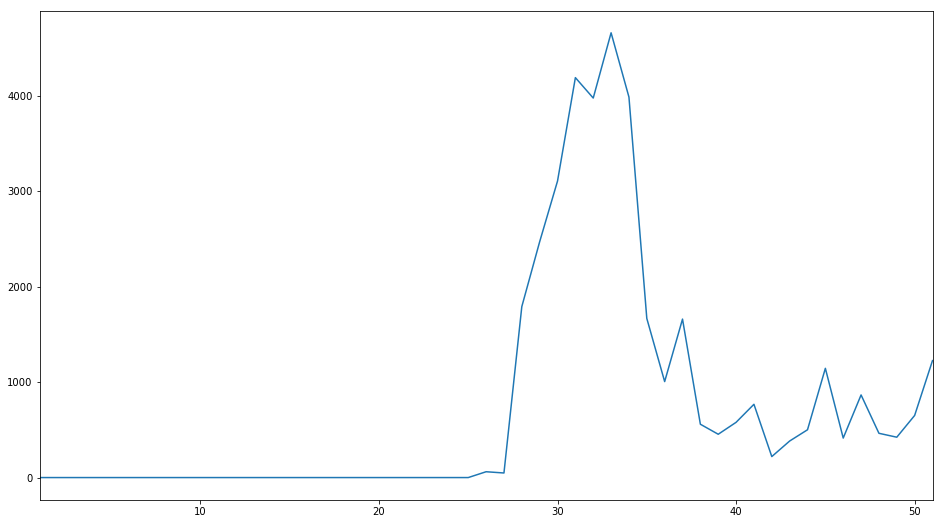

In [5]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)

Let us evaluate the quality

In [6]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


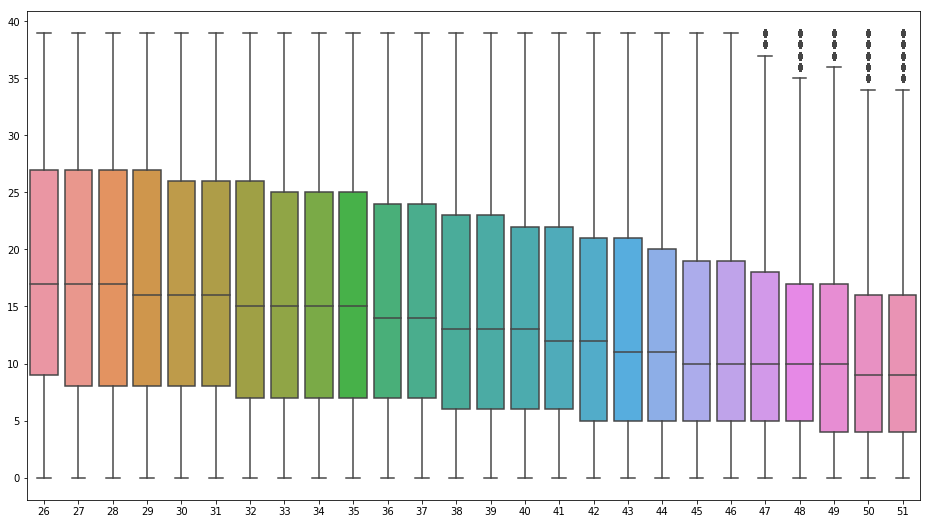

In [7]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass